In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../data/student_habits_performance.csv')

In [3]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

## Checking for outliers

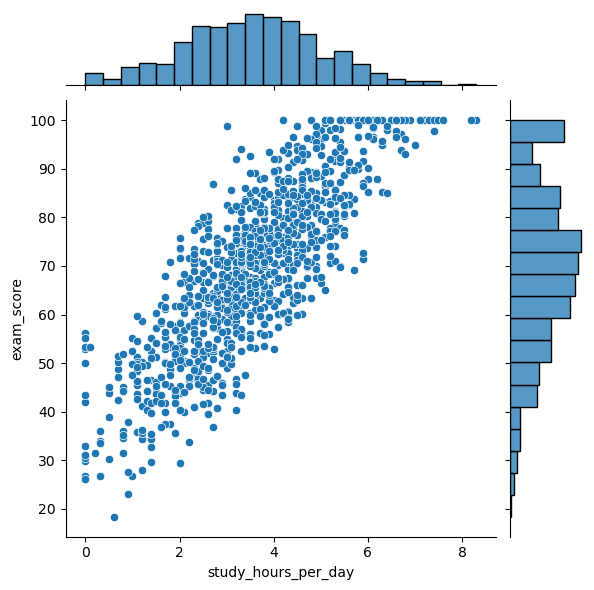

In [6]:
#Study hours per day
sns.jointplot(x='study_hours_per_day', y='exam_score', data=data)

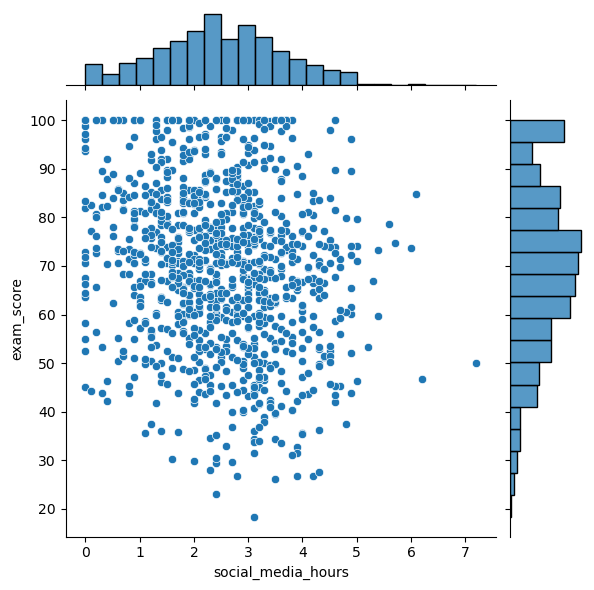

In [7]:
# Social media hours
sns.jointplot(x='social_media_hours', y='exam_score', data=data)

## Checking for skewed data

/var/folders/9f/t75s07xx62g6nmkgkj3vmblh0000gn/T/ipykernel_1073/594457789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.study_hours_per_day,  hist=True, kde=True)


<Axes: ylabel='Density'>

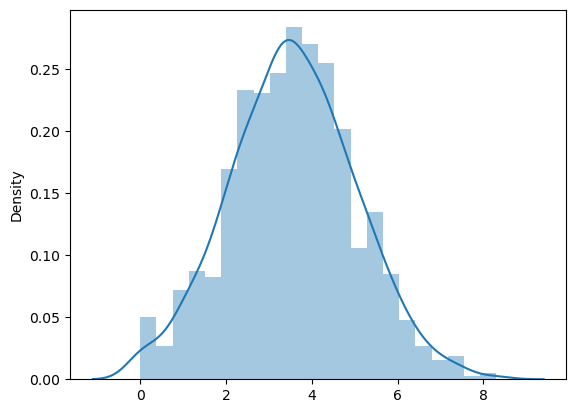

In [8]:
sns.distplot(x =data.study_hours_per_day,  hist=True, kde=True)

/var/folders/9f/t75s07xx62g6nmkgkj3vmblh0000gn/T/ipykernel_1073/1986737355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.social_media_hours,  hist=True, kde=True)


<Axes: ylabel='Density'>

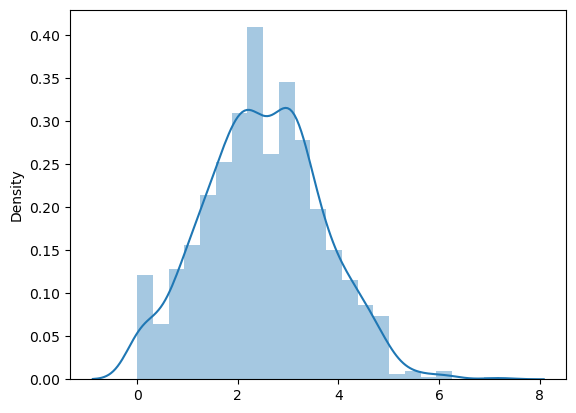

In [9]:
sns.distplot(x =data.social_media_hours,  hist=True, kde=True)

# Observation
From the Extended Data Distribution(EDD), The dataset looks evenly distributed. No one column had values out of range. I checked for outliers just to be sure of what i noticed from the EDD. Also I checked for skewed data, and from the chart above, the colums look evenly distributed

# Data Visualization

In [10]:
#import matplotlib.pyplot as plt

## Handling Categorical Data

## Gender Column

<Axes: xlabel='gender', ylabel='count'>

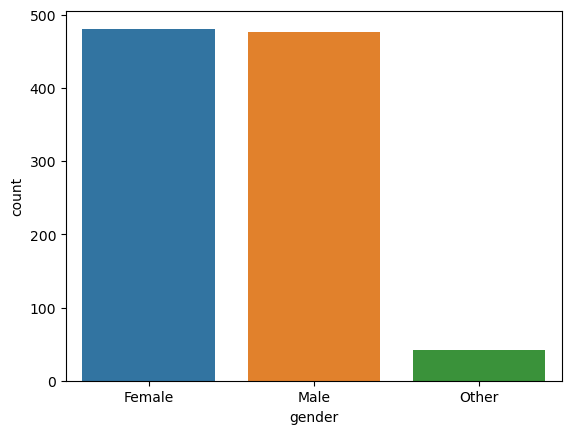

In [11]:
sns.countplot(x="gender", data=data)

### Observation 
From the countplot above, I notice there is no inherent order/ranking. Therefore, I will be using a Label encoder to encode it.

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['gender'])
data['gender'] = encoded_data

## Part time Job column

<Axes: xlabel='part_time_job', ylabel='count'>

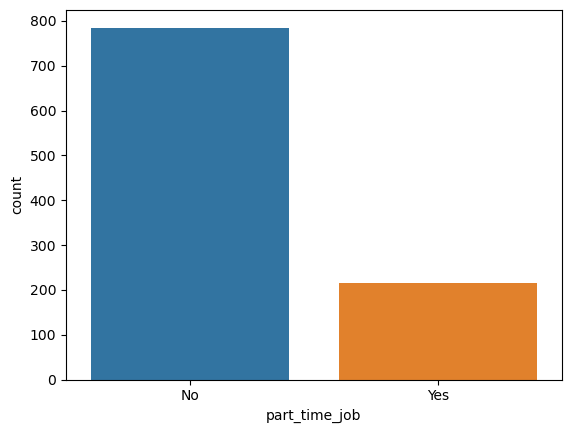

In [13]:
sns.countplot(x="part_time_job", data=data)

### Observation 
From the countplot above, I notice there is no inherent order/ranking. Therefore, I will be using a Label encoder to encode it.

In [14]:
encoded_data = encoder.fit_transform(data['part_time_job'])
data['part_time_job'] = encoded_data

## Diet Quality column

<Axes: xlabel='diet_quality', ylabel='count'>

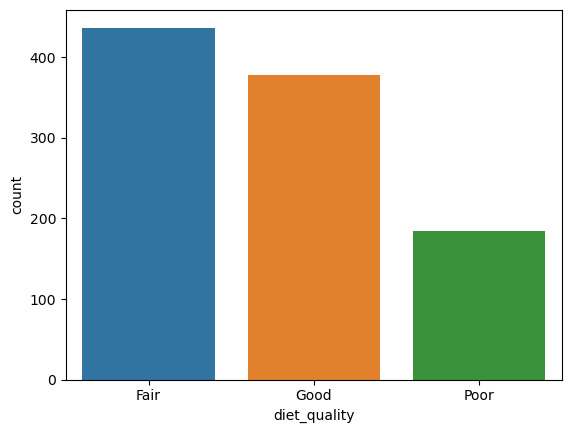

In [15]:
sns.countplot(x="diet_quality", data=data)

### Observation 
From the countplot above, I notice there is an inherent order/ranking. Therefore, I will be using an ordinal encoder to encode it.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Manually specify the order mapping
order_mapping = [['Poor','Fair', 'Good']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(data[['diet_quality']])
data['diet_quality'] = encoded_data

## Parental Education Level

<Axes: xlabel='parental_education_level', ylabel='count'>

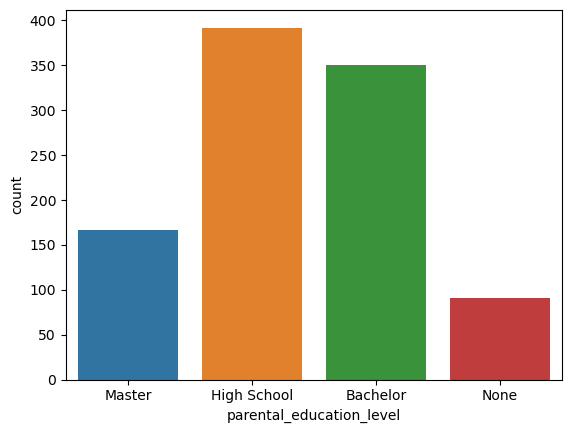

In [17]:
sns.countplot(x="parental_education_level", data=data)

### Observation 
From the countplot above, I notice there is an inherent order/ranking. Therefore, I will be using an ordinal encoder to encode it.

In [18]:
order_mapping = [['None','High School', 'Bachelor', 'Master']]

encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(data[['parental_education_level']])
data['parental_education_level'] = encoded_data

## Internet Quality

<Axes: xlabel='internet_quality', ylabel='count'>

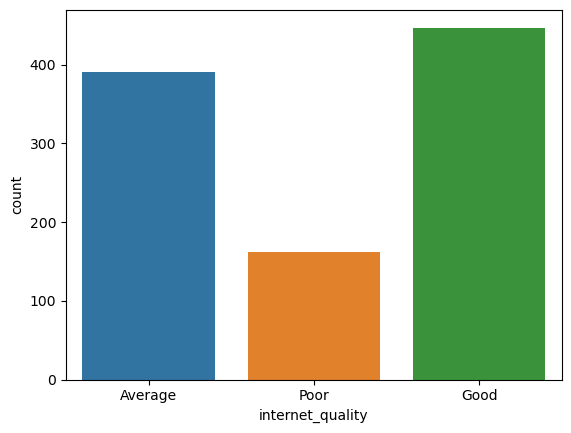

In [19]:
sns.countplot(x="internet_quality", data=data)

### Observation 
From the countplot above, I notice there is an inherent order/ranking. Therefore, I will be using an ordinal encoder to encode it.

In [20]:
order_mapping = [['Poor','Average', 'Good']]

encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(data[['internet_quality']])
data['internet_quality'] = encoded_data

## Extracurricular Participation

<Axes: xlabel='extracurricular_participation', ylabel='count'>

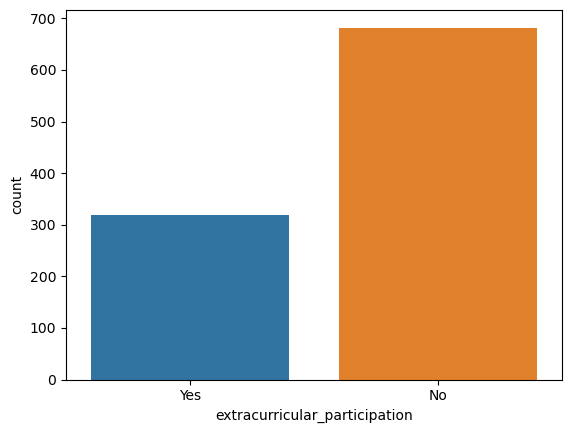

In [21]:
sns.countplot(x="extracurricular_participation", data=data)

### Observation 
From the countplot above, I notice there is no inherent order/ranking. Therefore, I will be using a Label encoder to encode it.

In [22]:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['extracurricular_participation'])
data['extracurricular_participation'] = encoded_data

In [23]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,1.0,6,3.0,1.0,8,1,56.2
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,2.0,6,1.0,1.0,8,0,100.0
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,0.0,1,1.0,0.0,1,0,34.3
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,0.0,4,3.0,2.0,1,1,26.8
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,1.0,3,3.0,2.0,1,0,66.4


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   int64  
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   int64  
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   float64
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   float64
 12  internet_quality               1000 non-null   fl

## Checking for MultiColinearity

/var/folders/9f/t75s07xx62g6nmkgkj3vmblh0000gn/T/ipykernel_1073/3811691856.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', center=0, square=True)


<Axes: >

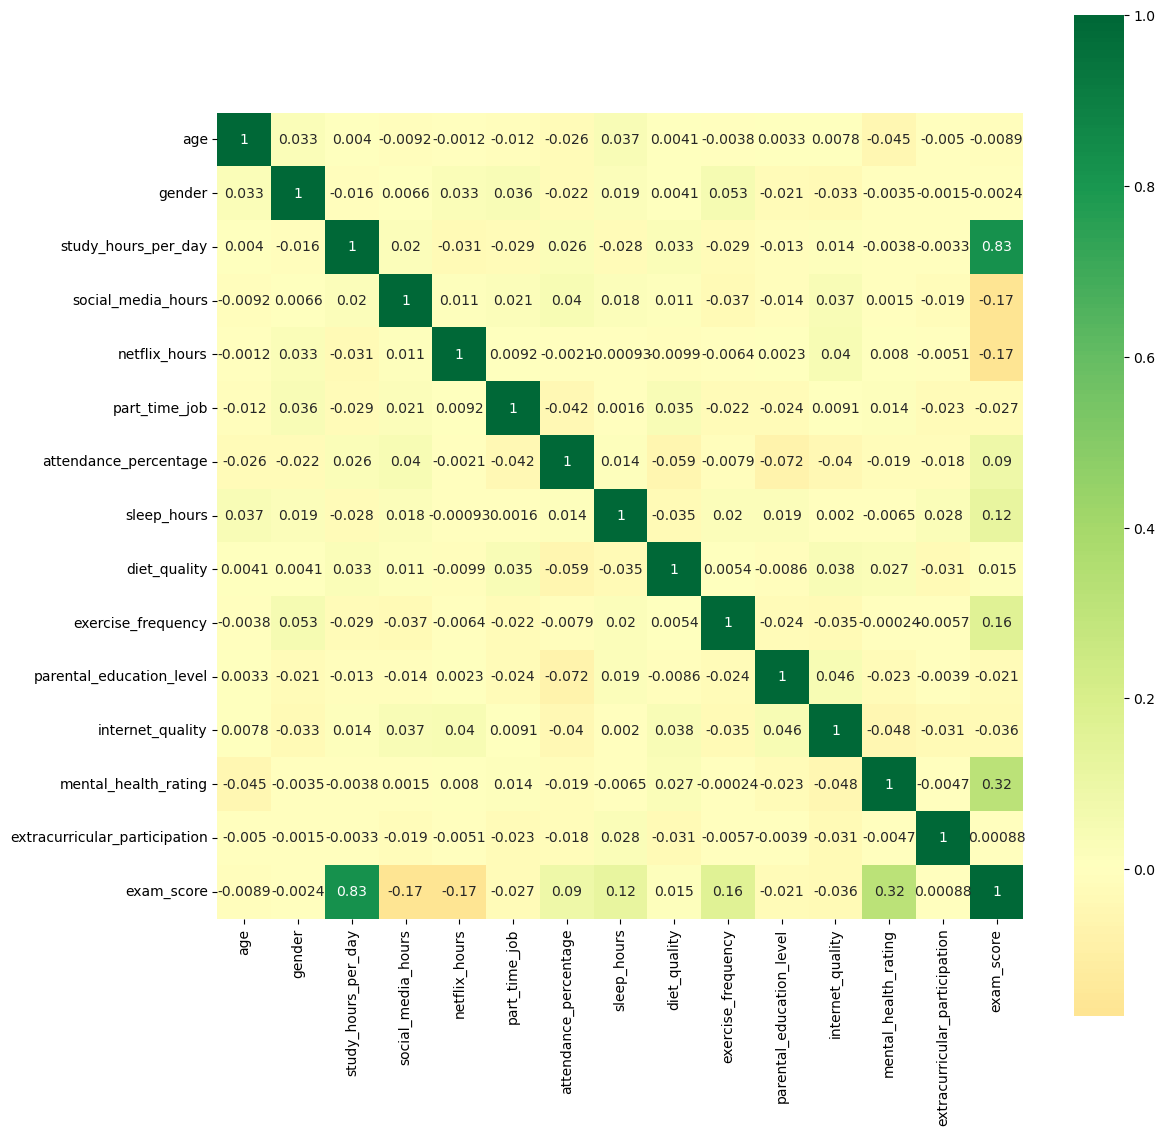

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

## Observation
From the heatmap above, I didn't notice any multi-colinear columns

In [26]:
data = data.drop("student_id",axis=1)

# Training a Model using Linear Regression

## Checking the model performance without feature selection

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = data.drop("exam_score", axis=1)
y = data['exam_score']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_train)

### Training Model

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y_train, y_pred)


0.9013623006555946

In [33]:
mean_absolute_error(y_train, y_pred)

4.235184091213372

### Test Model

In [34]:
y_test_pred = lr.predict(X_test)
r2_score(y_test, y_test_pred)


0.8988414260742964

In [35]:
mean_absolute_error(y_test, y_test_pred)

4.1447584109104705

## Checking the model performance with feature selection

In [36]:
#feature names
feature_names = X_train.columns  # Replace <your_feature_names> with the actual feature names from your dataset

# Get the coefficients
coefficients = lr.coef_

# Print feature names and coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}:\t\t\t {coef}")

age:			 0.05346290472816446
gender:			 0.20907796807130863
study_hours_per_day:			 9.544732377566561
social_media_hours:			 -2.7046373789518747
netflix_hours:			 -2.3155040956871855
part_time_job:			 0.38599987380381295
attendance_percentage:			 0.14598949686395546
sleep_hours:			 1.980665371273842
diet_quality:			 -0.32586242147011213
exercise_frequency:			 1.3164519946745754
parental_education_level:			 0.08916358750522468
internet_quality:			 -0.11464038840088503
mental_health_rating:			 1.9553228479025642
extracurricular_participation:			 -0.16187775410778382


### From the feature names and coefficients above, the features I will be selecting includes
- study_hours_per_day
- social_media_hours
- netflix_hours
- sleep_hours
- exercise_frequency
- mental_health_rating

I used features with coefficients greater than 0.5 and less than -0.5

In [37]:
selected_features = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

In [38]:
X_selected = X_train[selected_features]


In [39]:
lr_selected = LinearRegression()
lr_selected.fit(X_selected, y_train)

LinearRegression()

In [40]:
y_selected_pred = lr_selected.predict(X_selected)

### Training model

In [41]:
r2_score(y_train, y_selected_pred)


0.8945043092122549

In [42]:
mean_absolute_error(y_train, y_selected_pred)

4.4080279682353725

### Test model

In [43]:
y_test_selected_pred = lr_selected.predict(X_test[selected_features])

In [44]:
r2_score(y_test, y_test_selected_pred)


0.8926317423720704

In [45]:
mean_absolute_error(y_test, y_test_selected_pred)

4.279537099530286

## Observation
I was able to handle overfitting using feature selection. The accuracy of the model was reduced though



# Decision Tree Regression

## without feature selection

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt = DecisionTreeRegressor()

In [48]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
y_pred = dt.predict(X_train)

### Training model

In [50]:
r2_score(y_train, y_pred)


1.0

In [51]:
mean_absolute_error(y_train, y_pred)

0.0

### Test model

In [52]:
y_test_pred = dt.predict(X_test)
r2_score(y_test, y_test_pred)


0.684170785362048

In [53]:
mean_absolute_error(y_test, y_test_pred)

7.146000000000002

## Using feature selection

In [54]:
dt_selected = DecisionTreeRegressor()
dt_selected.fit(X_selected, y_train)

DecisionTreeRegressor()

In [55]:
y_selected_pred = dt_selected.predict(X_selected)

### Training model

In [56]:
r2_score(y_train, y_selected_pred)


1.0

In [57]:
mean_absolute_error(y_train, y_selected_pred)

0.0

### Test model

In [58]:
y_test_selected_pred = dt_selected.predict(X_test[selected_features])
r2_score(y_test, y_test_selected_pred)


0.6835622350749152

In [59]:
mean_absolute_error(y_test, y_test_selected_pred)

7.0985000000000005

## Observation
Using a decision tree regressor, there was a case of overfitting. Even after using feature selection, the model was still overfitted. 


# Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf = RandomForestRegressor()

## Without feature selection

In [62]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)

### Train data

In [63]:
r2_score(y_train, y_pred)


0.9799248842786873

In [64]:
mean_absolute_error(y_train, y_pred)

1.9165150000000022

### Test data

In [65]:
y_test_pred = rf.predict(X_test)
r2_score(y_test, y_test_pred)


0.8473895345518825

In [66]:
mean_absolute_error(y_test, y_test_pred)

4.921985000000001

## Feature selection

In [67]:
rf_selected = RandomForestRegressor()

In [68]:
rf_selected.fit(X_selected,y_train)

RandomForestRegressor()

In [69]:
y_selected_pred = rf_selected.predict(X_selected)

### Training data

In [70]:
r2_score(y_train, y_selected_pred)


0.9804087162171196

In [71]:
mean_absolute_error(y_train, y_selected_pred)

1.8850375000000021

### Test Data

In [72]:
y_test_selected_pred = rf_selected.predict(X_test[selected_features])
r2_score(y_test, y_test_selected_pred)


0.8599853960605157

In [73]:
mean_absolute_error(y_test, y_test_selected_pred)

4.839484999999997

## Observation
Using a Random forest regressor, there was a case of overfitting. It was not as high as the decision tree model. Also the test accuracy increased afte rusing feature selection


In [74]:
data.to_csv("../data/Cleaned_student_habit_performance.csv", index = False)